In [1]:
import matplotlib.pyplot as plt
import nmrglue
import numpy as np
import os
import sys


def getMaxIndex(pdata, x_ticks, position, epsilon=1.0):
    indexes = np.where((x_ticks > position - epsilon) & (x_ticks < position + epsilon))[0]
    return np.argmax(pdata[:,indexes].sum(axis=1))


def calcMobility(angle, distance, bigDelta, gradPower, smallDelta):
    # bigDelta - d20
    # smallDelta - p30
    return angle * distance * np.pi * 10 ** 8 / (bigDelta * (2.68 * 10 ** 8) * gradPower * 180 * smallDelta)


def getXRange(params):
    O1P = params['acqus']['O1']/params['acqus']['SFO1']
    SW = params['acqus']['SW']


    return O1P + SW / 2, O1P - SW / 2


def getYRange(pdata, x_ticks):
    y_sum = pdata.sum(axis=1)

    # calculcate deltaC based on known mobility
    #c = calcMobility(angle=0.6875, distance=0.0377, bigDelta=(300 * 10 ** -3), gradPower=35 * 10 ** -3, smallDelta=(10 ** -3)) / 10
    #max_index = np.argmax(y_sum)
    #zero_index = getMaxIndex(pdata, x_ticks, 4.79)
    #deltaC = (max_index - zero_index) / c
    #print(deltaC)

    # use hardcoded deltaC when mobility is not known
    zero_index = np.argmax(y_sum)
    deltaC = 2.4882422732549014
    return (0 - zero_index) / deltaC, (pdata.shape[0] - 1 - zero_index) / deltaC


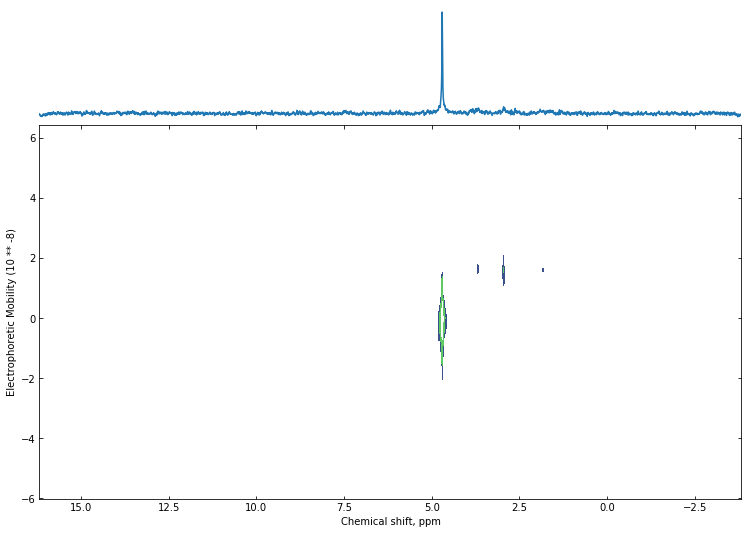

In [4]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)

levels = np.linspace(np.min(pdata), np.max(pdata), 40)

x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

countour.contourf(X, Y, pdata, levels=levels[2:5])
#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(x_min, x_max)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(x_min, x_max)
spectrum_x.axis('off')

#spectrum_y.plot(y_sum, y_ticks)
#spectrum_y.set_ylim(y_min, y_max)
#spectrum_y.axis('off')

plt.show()

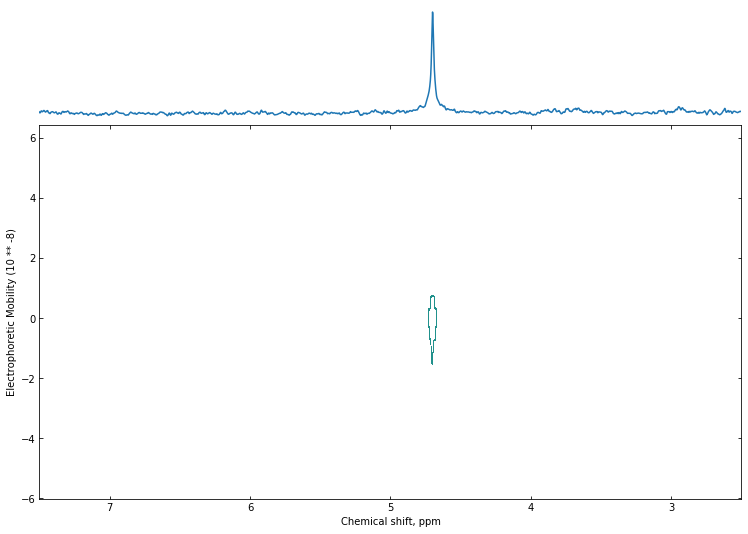

In [72]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)


x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

pdata_new = pdata
pdata_new[pdata_new<93669] = 0
levels = np.linspace(np.min(pdata_new), np.max(pdata_new), 40)

countour.contourf(X, Y, pdata_new, levels=levels[2:4])


#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(7.5, 2.5)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(7.5, 2.5)
spectrum_x.axis('off')

plt.show()

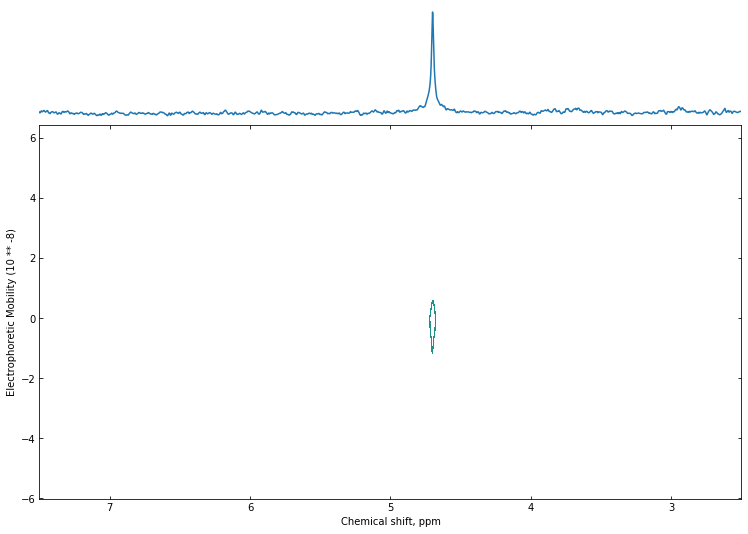

In [124]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)


x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

pdata_new = pdata
levels = np.linspace(np.min(pdata_new), np.max(pdata_new), 40)

countour.contourf(X, Y, pdata_new, levels=levels[11:13])


#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(7.5, 2.5)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(7.5, 2.5)
spectrum_x.axis('off')

plt.show()

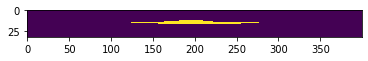

In [52]:
plt.imshow(pdata[:,37596-200:37596+200]>0)

In [53]:
import cv2

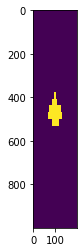

In [62]:
plt.imshow(cv2.resize((pdata[:,37596-300:37596+300]>0).astype(np.uint8),(200,1000)))

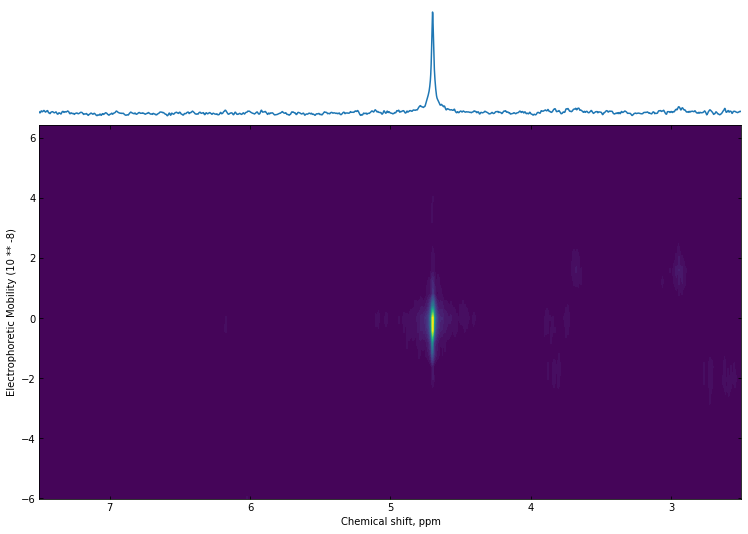

In [92]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)


x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

pdata_new = (255*pdata/pdata.max()).astype(np.uint8)
levels = np.linspace(np.min(pdata_new), np.max(pdata_new), 40)

countour.contourf(X, Y, pdata_new, levels=levels)


#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(7.5, 2.5)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(7.5, 2.5)
spectrum_x.axis('off')

plt.show()

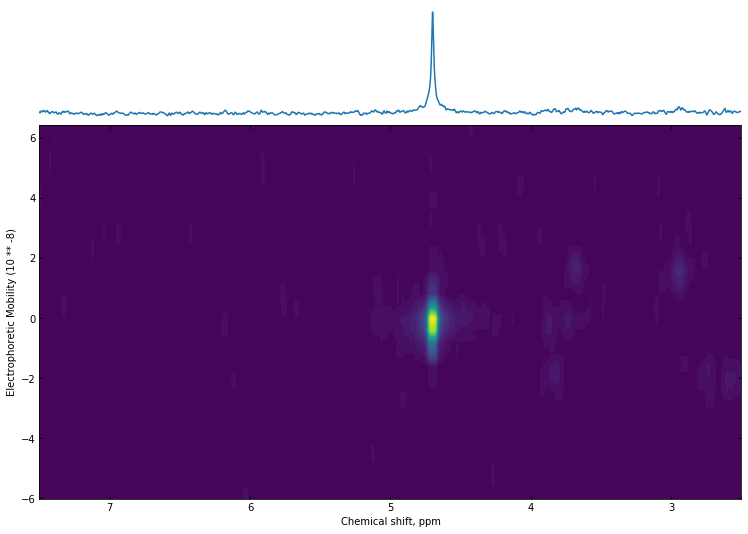

In [123]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)


x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

pdata_new = cv2.blur((255*pdata/pdata.max()).astype(np.uint8),(200,1))
levels = np.linspace(np.min(pdata_new), np.max(pdata_new), 40)

countour.contourf(X, Y, pdata_new, levels=levels)


#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(7.5, 2.5)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(7.5, 2.5)
spectrum_x.axis('off')

plt.show()

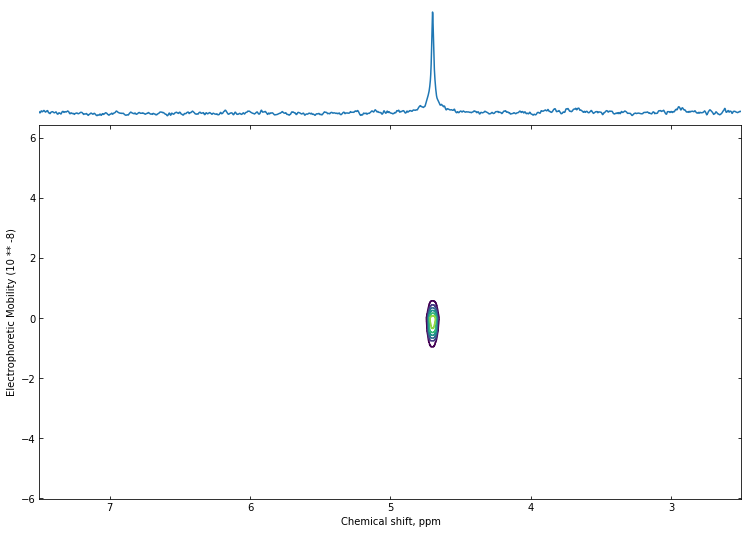

In [121]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)


x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

pdata_new = cv2.blur((255*pdata/pdata.max()).astype(np.uint8),(200,1))
levels = np.linspace(np.min(pdata_new), np.max(pdata_new), 10)

countour.contour(X, Y, pdata_new, levels=levels[3:])


#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(7.5, 2.5)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(7.5, 2.5)
spectrum_x.axis('off')

plt.show()

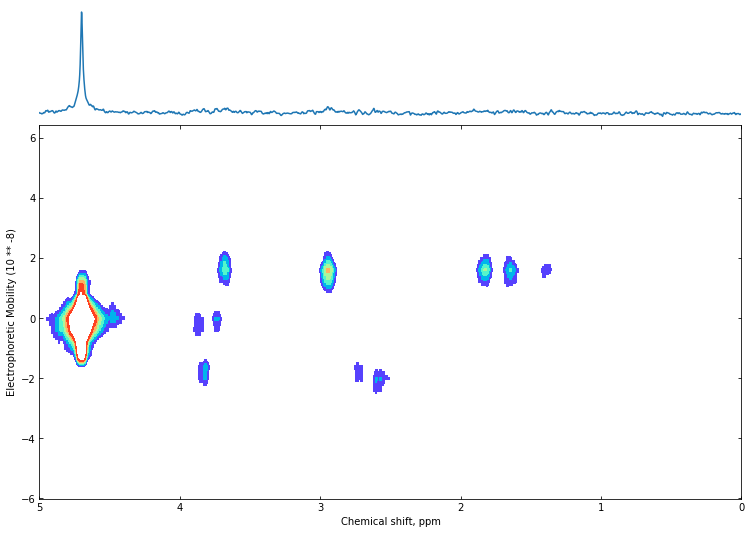

In [139]:

left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005

countour = [left, bottom, width, height]
spectrum_x = [left, bottom + height + spacing, width, 0.2]
#spectrum_y = [left + width + spacing, bottom, 0.2, height]

plt.figure(figsize = (15,8))

countour = plt.axes(countour)
countour.tick_params(direction='in', top=True, right=True)
spectrum_x = plt.axes(spectrum_x)
spectrum_x.tick_params(direction='in', labelbottom=False)
#spectrum_y = plt.axes(spectrum_y)
#spectrum_y.tick_params(direction='in', labelleft=False)

path = os.path.abspath(sys.argv[1] if len(sys.argv) == 2 else os.getcwd())
params, pdata = nmrglue.fileio.bruker.read_pdata(dir=os.path.join(path, 'pdata', '1'))

x_min, x_max = getXRange(params)
x_ticks = np.linspace(x_min, x_max, pdata.shape[1])

y_min, y_max = getYRange(pdata, x_ticks)
y_ticks = np.linspace(y_min, y_max, pdata.shape[0])

X, Y = np.meshgrid(x_ticks, y_ticks)


x_sum = pdata.sum(axis=0)
#y_sum = pdata.sum(axis=1)

pdata_new = cv2.blur((255*pdata/pdata.max()).astype(np.uint8),(200,1))
levels = np.linspace(np.min(pdata_new), np.max(pdata_new), 65)

countour.contourf(X, Y, pdata_new, levels=levels[3:10], cmap='rainbow')


#countour.contour(X, Y, pdata, levels=20)
countour.set_xlabel('Chemical shift, ppm')
countour.set_xlim(5, 0)
countour.set_ylim(y_min, y_max)
countour.set_ylabel('Electrophoretic Mobility (10 ** -8)')

spectrum_x.plot(x_ticks, x_sum)
spectrum_x.set_xlim(5, 0)
spectrum_x.axis('off')

#spectrum_y.plot(y_sum, y_ticks)
#spectrum_y.set_ylim(y_min, y_max)
#spectrum_y.axis('off')

plt.show()